# Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load, Understand, and Visualize Data

In [2]:
# Load the iris dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Print the number of features and objects
print(f"Number of features: {df.shape[1]}")
print(f"Number of samples: {df.shape[0]}")

# Add target to the DataFrame
df['target'] = data.target

# Print shape and head of the DataFrame
print(f"Shape: {df.shape}")
print(df.head())

Number of features: 4
Number of samples: 150
Shape: (150, 5)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [5]:
# Check for missing data
print(df.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [6]:
labels = data.target_names
feature_names = data.feature_names
print(f"Number of Classes: {len(labels)} \n {labels}")
print(f"Number of Features: {len(feature_names)} \n {feature_names}")

Number of Classes: 3 
 ['setosa' 'versicolor' 'virginica']
Number of Features: 4 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


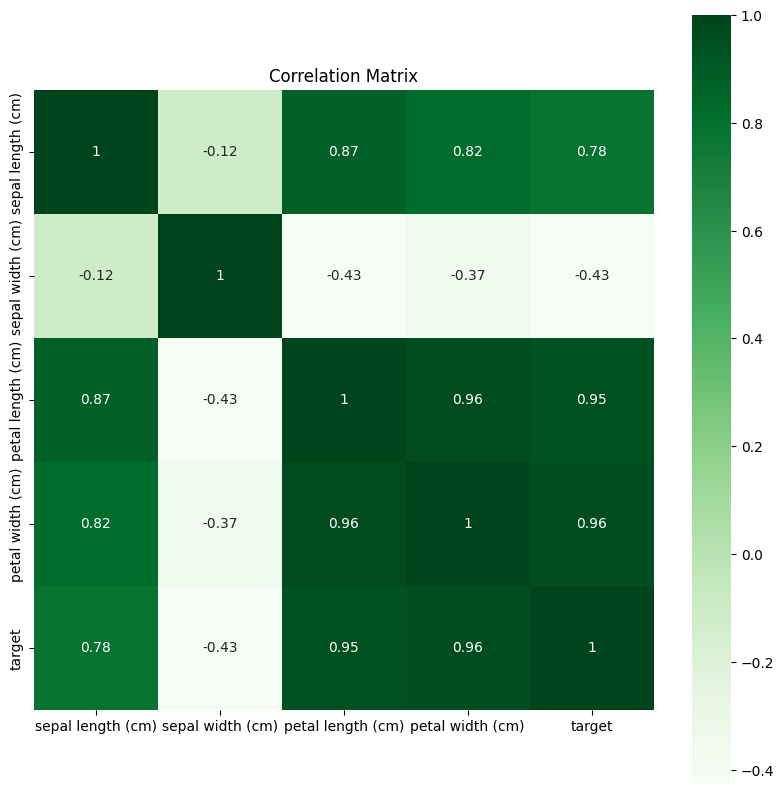

In [7]:
# Visualize correlation matrix
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, cbar=True, square=True, annot=True, annot_kws={"size": 10}, cmap="Greens")
plt.title('Correlation Matrix')
plt.show()

# Split Data

In [8]:
# Split the dataset into features and target
X = df[feature_names]
y = df["target"]

# Split data into training and test sets (70|30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the Data

In [9]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # Use transform instead of fit_transform for test data

# Print the first three samples of standardized training data
print(X_train[:3])

[[-0.4134164  -1.46200287 -0.09951105 -0.32339776]
 [ 0.55122187 -0.50256349  0.71770262  0.35303182]
 [ 0.67180165  0.21701605  0.95119225  0.75888956]]


# Train the Model

In [10]:
# Train the Perceptron model
ppn = Perceptron(max_iter=100, eta0=0.1)
ppn.fit(X_train, y_train)

Perceptron(eta0=0.1, max_iter=100)

# Evaluation Function

In [11]:
# Function to evaluate the model
def evaluate_model(y_true, y_pred, dataset_type):
    # Confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False, square=True,
                xticklabels=labels,
                yticklabels=labels)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(f'Confusion Matrix for {dataset_type} Set')
    plt.show()

    # Print accuracy score
    print(f"Accuracy score on {dataset_type} set: {accuracy_score(y_true, y_pred)}")
    print(f"F1 score on {dataset_type} set: {f1_score(y_true, y_pred, average='weighted')}\n")

# Evaluate Model on Training and Test Sets

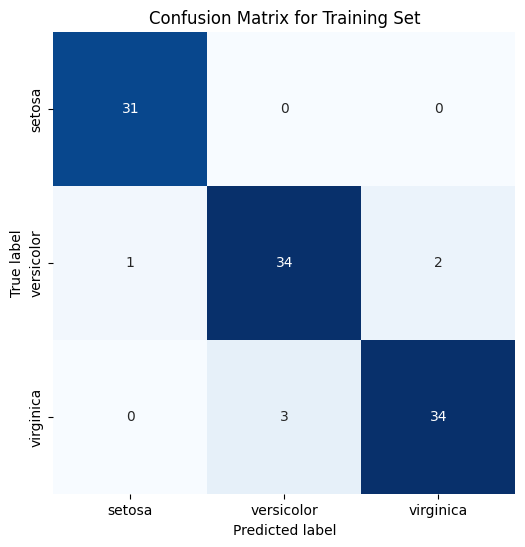

Accuracy score on Training set: 0.9428571428571428
F1 score on Training set: 0.9426065707866099



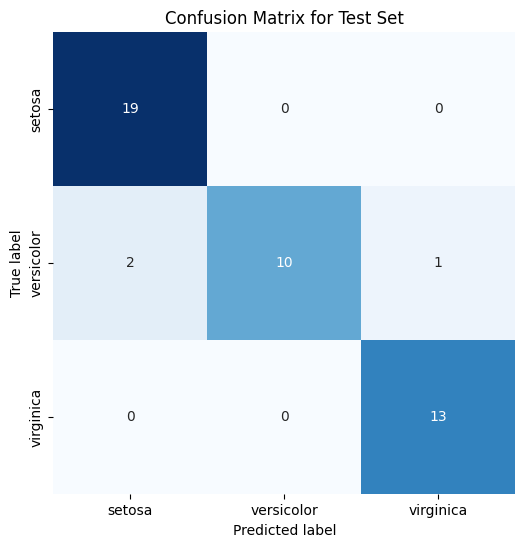

Accuracy score on Test set: 0.9333333333333333
F1 score on Test set: 0.9305081409912328



In [12]:
# Make predictions on the training set
y_pred_train = ppn.predict(X_train)

# Evaluate the model on the training set
evaluate_model(y_train, y_pred_train, "Training")

# Make predictions on the test set
y_pred_test = ppn.predict(X_test)

# Evaluate the model on the test set
evaluate_model(y_test, y_pred_test, "Test")

# Predict on a New Data Point

In [13]:
# Create a dictionary for class labels
dict_labels = {i: label for i, label in enumerate(labels)}

In [14]:
# Predict on a new data point
new_data_point = scaler.transform([[50, 50, 50, 50]])  # Example data point
predicted = ppn.predict(new_data_point)
print(f"Prediction for this flower: {dict_labels[predicted[0]]}")

Prediction for this flower: virginica
